# Scalar LMMSE for First-order AR Process
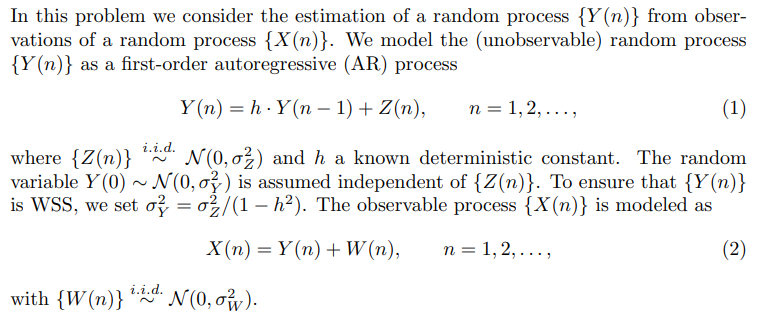

In [1]:
import numpy as np
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
import tqdm
import scipy.linalg

#### Generate realizations of X and Y and experiment with values for variances and h

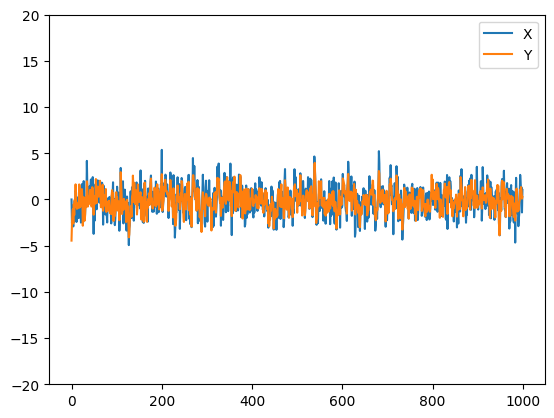

In [2]:
n = 1000
h = 0.5
sigma_z = 1
sigma_w = 1
sigma_y = sigma_z/(1-h**2)

Z = np.random.normal(0, sigma_z, n)
W = np.random.normal(0, sigma_w, n)

#initialize Y and X
Y = np.zeros(n)
Y[0] = np.random.normal(0, sigma_y)
X = np.zeros(n)

for i in range(1,n):
    Y[i] = h*Y[i-1] + Z[i]
    X[i] = Y[i] + W[i]

# plot realizations of X and Y
plt.plot(X, label='X')
plt.plot(Y, label='Y')
plt.ylim(-20, 20)
plt.legend()
plt.show()


$\sigma_w^2$ seems to center the Y process

$\sigma_z^2$ seems to increase variance of both X and Y

$h$ scales the entire thing but is not allowed to be 1 and becomes unstable above 1

#### Derive the LMMSE for the process Y given observations of X
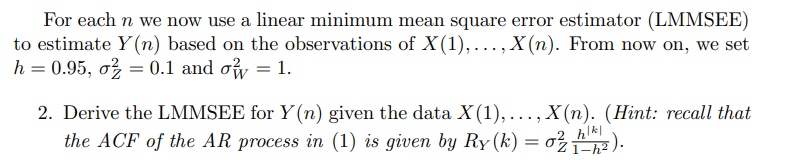

LMMSE = $\hat{Y}(n) = E[Y] - C_YX * C_XX * (X-E[X])$

Since Y and X are 0 mean this reduces to:

$\hat{Y}(n) = C_{YX} * C_{XX} * X$

Since we have multiple observation we have to work with the formula in vector form

$C_{YX}$ is a vector of autocorrelations with all the time lags back to time 0

$C_{XX}$ is the covariance matrix which can be found using a toeplitz

$X$ is just the observations

In [3]:

def LMMSE(num_realizations, n = 1000, h = 0.95, sigma_z = 0.1, sigma_w = 1):

    sigma_y = sigma_z / (1 - h**2)
    predictions = []
    MSE_list = []

    for _ in range(num_realizations):
        # Generate Z and W
        Z = np.random.normal(0, sigma_z, n)
        W = np.random.normal(0, sigma_w, n)

        # Initialize Y and X
        Y = np.zeros(n)
        Y[0] = np.random.normal(0, sigma_y)
        X = np.zeros(n)

        for i in range(1, n):
            Y[i] = h * Y[i-1] + Z[i]
            X[i] = Y[i] + W[i]

        # Autocorrelation of Y (time lag 0 is included)
        autocorr_Y = np.array([sigma_z * h**k / (1 - h**2) for k in range(n)])

        # Covariance matrix of X
        cov_X = scipy.linalg.toeplitz(autocorr_Y) + sigma_w * np.eye(n)

        # Inverse of covariance matrix of X
        cov_X_inv = np.linalg.inv(cov_X)

        # Cross-covariance vector r_X
        r_X = autocorr_Y  

        # LMMSE estimation
        Y_hat = r_X.T @ cov_X_inv @ X
        
        predictions.append(Y_hat)
        MSE_list.append(np.mean((Y-Y_hat)**2)) # squared error between true value and predicted value
        theoretical_mse = (sigma_z / (1 - h**2)) - r_X.T @ cov_X_inv @ r_X
    return predictions, MSE_list, theoretical_mse


In [6]:
predictions, mse, theoretical_mse = LMMSE(1000, 1000)

avg_mse = np.mean(mse)
print(f"theoretical MSE: {theoretical_mse}")
print(f"Average MSE: {avg_mse}")

ValueError: not enough values to unpack (expected 3, got 2)